In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import make_scorer, f1_score
import seaborn as sns
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_auc_score, roc_curve, auc, precision_recall_curve


In [2]:
!pip install ucimlrepo

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo
from sklearn.preprocessing import StandardScaler
import pandas as pd
X = pd.read_csv('banking-data.csv')
from ucimlrepo import fetch_ucirepo

# fetch dataset
bank_marketing = fetch_ucirepo(id=222)

# data (as pandas dataframes)
X = bank_marketing.data.features
y = bank_marketing.data.targets

# metadata
print(bank_marketing.metadata)

# variable information
print(bank_marketing.variables)

df=pd.DataFrame()
binary_cols = ['default', 'housing', 'loan']

for col in binary_cols:
    X[col] = X[col].map({'yes': 1, 'no': 0})
print("\n")
X = pd.get_dummies(X, columns= ['job', 'marital','education','contact','month','poutcome'])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

marital_columns = [col for col in X_scaled.columns if col.startswith('marital_')]
X_scaled['marital_total'] = X_scaled[marital_columns].mean(axis=1)

# Gộp các cột VisitorType_* thành một biến duy nhất
job_columns = [col for col in X_scaled.columns if col.startswith('job_')]
X_scaled['job_total'] = X_scaled[job_columns].mean(axis=1)

education_columns = [col for col in X_scaled.columns if col.startswith('education_')]
X_scaled['education_total'] = X_scaled[education_columns].mean(axis=1)

contact_columns = [col for col in X_scaled.columns if col.startswith('contact_')]
X_scaled['contact_total'] = X_scaled[contact_columns].mean(axis=1)

month_columns = [col for col in X_scaled.columns if col.startswith('month_')]
X_scaled['month_total'] = X_scaled[month_columns].mean(axis=1)

poutcome_columns = [col for col in X_scaled.columns if col.startswith('poutcome_')]
X_scaled['poutcome_total'] = X_scaled[poutcome_columns].mean(axis=1)

X_scaled = X_scaled.drop(columns=job_columns + marital_columns + education_columns +contact_columns +month_columns+poutcome_columns)
print(X_scaled)

{'uci_id': 222, 'name': 'Bank Marketing', 'repository_url': 'https://archive.ics.uci.edu/dataset/222/bank+marketing', 'data_url': 'https://archive.ics.uci.edu/static/public/222/data.csv', 'abstract': 'The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).', 'area': 'Business', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 45211, 'num_features': 16, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Occupation', 'Marital Status', 'Education Level'], 'target_col': ['y'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2014, 'last_updated': 'Fri Aug 18 2023', 'dataset_doi': '10.24432/C5K306', 'creators': ['S. Moro', 'P. Rita', 'P. Cortez'], 'intro_paper': {'ID': 277, 'type': 'NATIVE', 'title': 'A data-driven approach to predict the s

In [51]:
final_feature_order = X_scaled.columns.tolist()

import pickle
with open("model/final_feature_order.pkl", "wb") as f:
    pickle.dump(final_feature_order, f)


Thêm Scaler

In [4]:
import joblib
joblib.dump(scaler,'model\\scaler.plk')
my_scaler = joblib.load('model\\scaler.plk')

In [5]:
from imblearn.over_sampling import SMOTE

In [6]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

In [7]:
print("Phân phối dữ liệu sau SMOTE:")
print(pd.Series(y_resampled['y']).value_counts())

Phân phối dữ liệu sau SMOTE:
y
no     39922
yes    39922
Name: count, dtype: int64


In [8]:
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import make_scorer, f1_score
import seaborn as sns

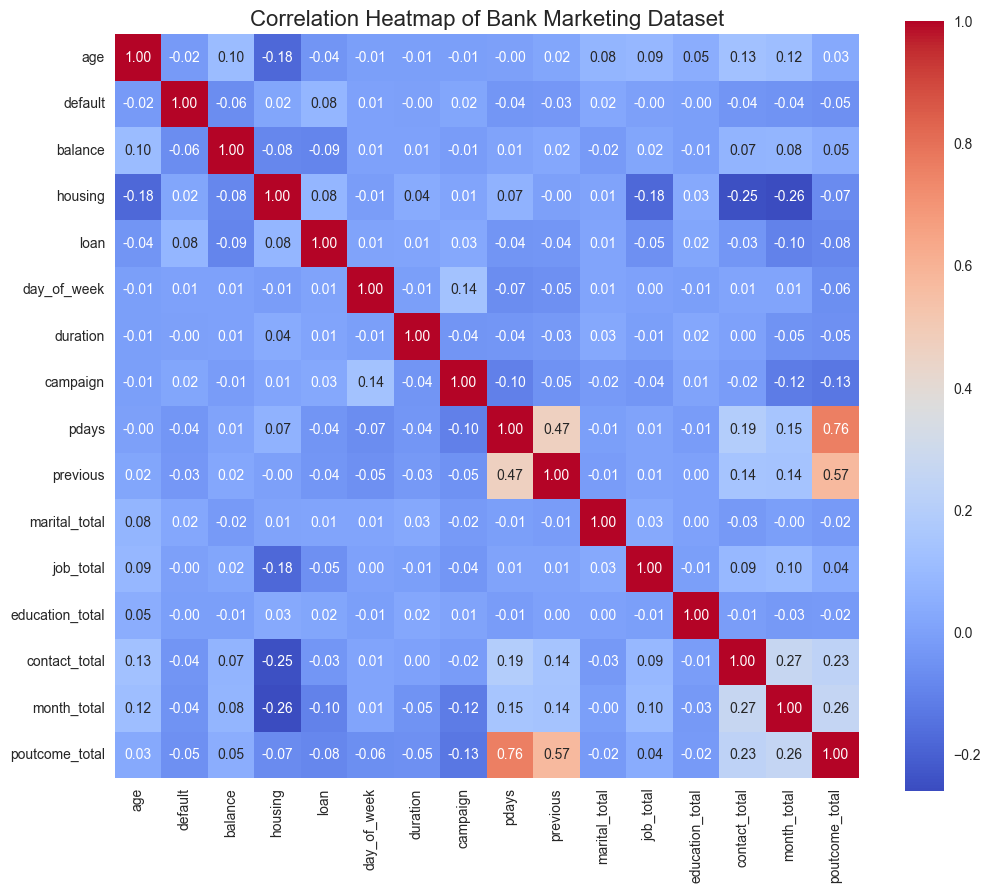

In [52]:
correlation_matrix = X_resampled.corr()

# Vẽ heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix,
            annot=True,
            fmt=".2f",
            cmap="coolwarm",
            cbar=True,
            square=True,
            annot_kws={"size": 10})

plt.title('Correlation Heatmap of Bank Marketing Dataset', fontsize=16)

plt.show()

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled, shuffle=True)

In [59]:
!pip uninstall pycaret -y

Found existing installation: pycaret 3.3.2
Uninstalling pycaret-3.3.2:
  Successfully uninstalled pycaret-3.3.2


In [60]:
!pip install pycaret

  Using cached pycaret-3.3.2-py3-none-any.whl.metadata (17 kB)
Using cached pycaret-3.3.2-py3-none-any.whl (486 kB)


In [61]:
!pip install --upgrade pycaret


In [54]:
from pycaret.classification import setup, compare_models

In [55]:
df = X.copy()
df['y'] = y.squeeze()

In [56]:
from pycaret.classification import setup, compare_models

In [57]:

model_setup = setup(
    data=df,
    target='y',
    session_id=123,
    fold=10
)

,Description,Value
0,Session id,123
1,Target,y
2,Target type,Binary
3,Target mapping,"no: 0, yes: 1"
4,Original data shape,"(45211, 45)"
5,Transformed data shape,"(45211, 45)"
6,Transformed train set shape,"(31647, 45)"
7,Transformed test set shape,"(13564, 45)"
8,Numeric features,10
9,Preprocess,True


In [14]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9086,0.9354,0.9086,0.9009,0.9035,0.5101,0.5152,0.3990
gbc,Gradient Boosting Classifier,0.9055,0.9251,0.9055,0.8941,0.8965,0.4606,0.4738,1.9180
rf,Random Forest Classifier,0.9046,0.9281,0.9046,0.8918,0.8934,0.4370,0.4562,1.3580
lda,Linear Discriminant Analysis,0.9006,0.9070,0.9006,0.8906,0.8938,0.4562,0.4632,0.2840
ridge,Ridge Classifier,0.8995,0.9070,0.8995,0.8830,0.8809,0.3506,0.3899,0.1640
ada,Ada Boost Classifier,0.8995,0.9102,0.8995,0.8854,0.8884,0.4125,0.4286,0.7270
lr,Logistic Regression,0.8993,0.8983,0.8993,0.8835,0.8852,0.3870,0.4108,3.3650
et,Extra Trees Classifier,0.8985,0.9108,0.8985,0.8832,0.8858,0.3941,0.4139,1.9270
dummy,Dummy Classifier,0.8830,0.5000,0.8830,0.7797,0.8282,0.0000,0.0000,0.1160
knn,K Neighbors Classifier,0.8810,0.7584,0.8810,0.8582,0.8649,0.2797,0.2961,0.7690


In [58]:
print(best_model)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)


In [59]:
# Training Random Forest
print("\n--- Random Forest ---")
RFclf = RandomForestClassifier(max_depth=10, random_state=0)
RFclf.fit(X_train, y_train)


--- Random Forest ---


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=None,
                       oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [60]:
class_name=np.unique(y_train).astype(str)
class_name

array(['no', 'yes'], dtype='<U3')

In [61]:
y_pred=RFclf.predict(X_train)
y_pred

array(['no', 'yes', 'yes', ..., 'no', 'yes', 'no'], dtype=object)

In [62]:
report = classification_report(y_train,y_pred,target_names=class_name)
print(report)

              precision    recall  f1-score   support

          no       0.96      0.90      0.93     31937
         yes       0.91      0.96      0.93     31938

    accuracy                           0.93     63875
   macro avg       0.93      0.93      0.93     63875
weighted avg       0.93      0.93      0.93     63875



In [63]:
#logictic regress
LRclf = LogisticRegression(random_state=0)
LRclf.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [64]:
y_pred=LRclf.predict(X_train)
y_pred

array(['no', 'yes', 'yes', ..., 'no', 'yes', 'no'], dtype=object)

In [65]:
report = classification_report(y_train,y_pred)
print(report)

              precision    recall  f1-score   support

          no       0.81      0.83      0.82     31937
         yes       0.82      0.80      0.81     31938

    accuracy                           0.82     63875
   macro avg       0.82      0.82      0.82     63875
weighted avg       0.82      0.82      0.82     63875



In [ ]:
#GBoosting

In [66]:
GBMclf = GradientBoostingClassifier()
GBMclf.fit(X_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [67]:
y_predict=GBMclf.predict(X_train)
y_predict

array(['no', 'yes', 'yes', ..., 'no', 'yes', 'no'], dtype=object)

In [68]:
report = classification_report(y_train, y_predict)
print(report)

              precision    recall  f1-score   support

          no       0.93      0.93      0.93     31937
         yes       0.93      0.93      0.93     31938

    accuracy                           0.93     63875
   macro avg       0.93      0.93      0.93     63875
weighted avg       0.93      0.93      0.93     63875



In [69]:
y_pred=GBMclf.predict(X_test)
y_pred

array(['no', 'no', 'yes', ..., 'yes', 'yes', 'yes'], dtype=object)

In [70]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

          no       0.93      0.93      0.93      7985
         yes       0.93      0.93      0.93      7984

    accuracy                           0.93     15969
   macro avg       0.93      0.93      0.93     15969
weighted avg       0.93      0.93      0.93     15969



In [118]:
#Danh gia mo hinh
# y_test_numeric = np.array([1 if x == 'yes' else 0 for x in y_test])


--- Evaluating Random Forest ---


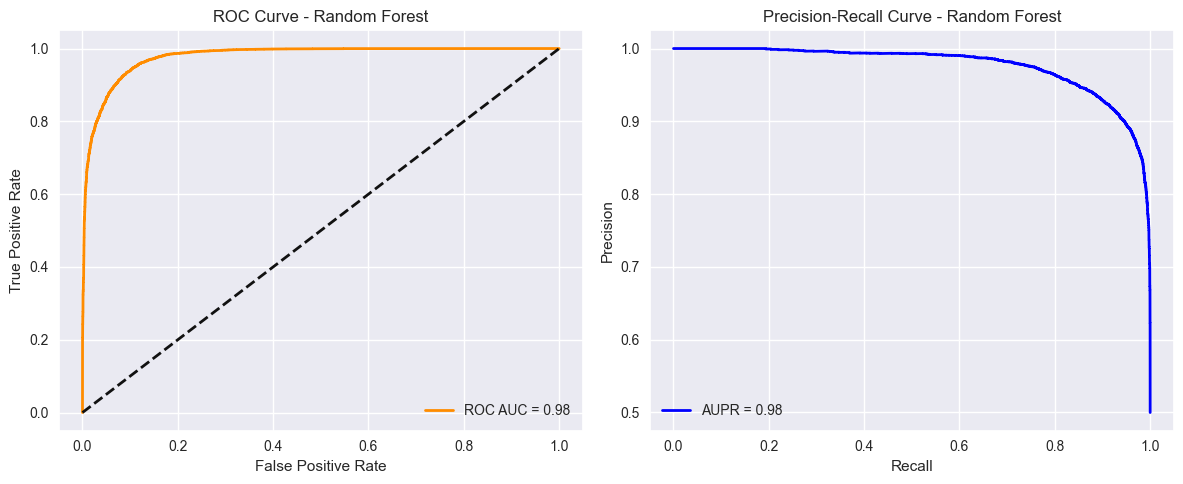

ROC AUC: 0.98
AUPR: 0.98

--- Evaluating Logistic Regression ---


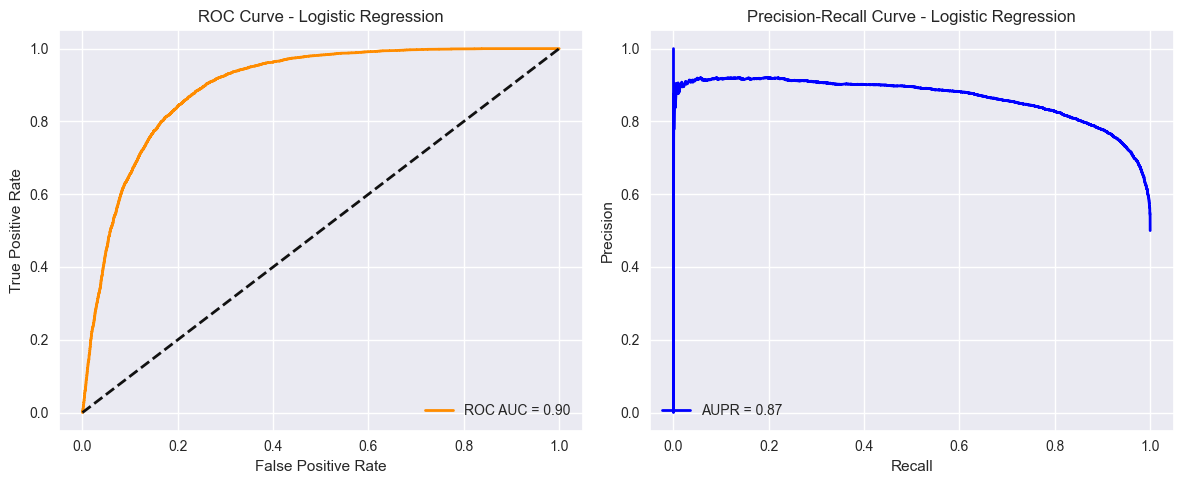

ROC AUC: 0.90
AUPR: 0.87

--- Evaluating Gradient Boosting ---


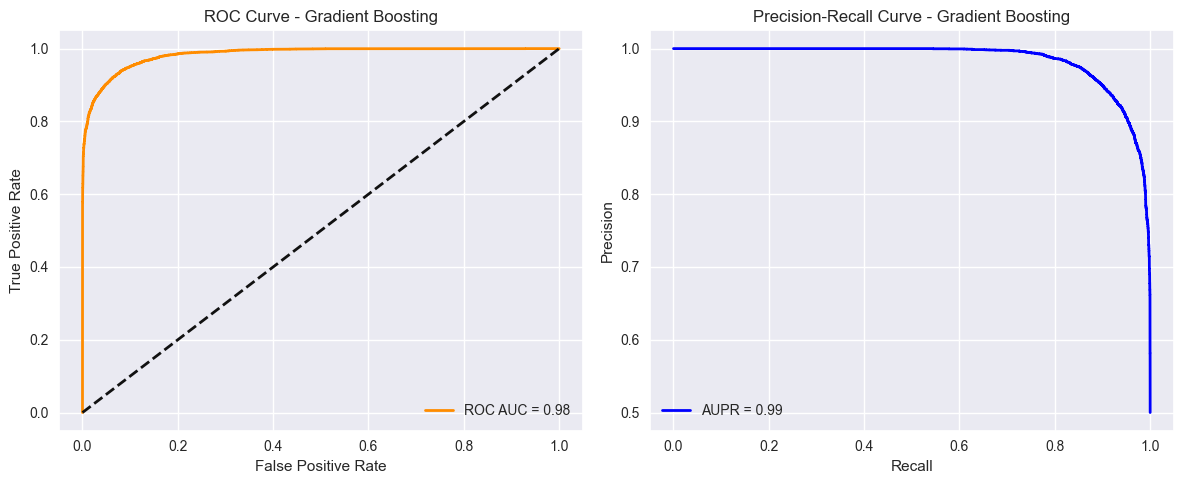

ROC AUC: 0.98
AUPR: 0.99


In [80]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import roc_curve, auc, precision_recall_curve

def plot_curves(model, X_test, y_test, model_name):
    # --- BƯỚC SỬA LỖI QUAN TRỌNG ---
    # Kiểm tra xem y_test có phải là DataFrame không.
    # Nếu đúng, lấy cột đầu tiên để biến nó thành Series (mảng 1 chiều)
    if hasattr(y_test, 'columns'):
        y_test = y_test.iloc[:, 0]

    # DỰ ĐOÁN:
    y_prob = model.predict_proba(X_test)[:, 1]

    # CẤU HÌNH NHÃN POSITIVE:
    # Mặc định là 'yes'
    pos_label_value = 'yes'

    # Kiểm tra kiểu dữ liệu (lúc này y_test đã là Series nên có .dtype)
    # Nếu dữ liệu không phải là object (nghĩa là số), thì pos_label là 1
    if y_test.dtype != 'object':
        pos_label_value = 1

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_prob, pos_label=pos_label_value)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(12, 5))

    # Plot ROC
    plt.subplot(1, 2, 1)
    plt.plot(fpr, tpr, label=f'ROC AUC = {roc_auc:.2f}', color='darkorange', lw=2)
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend(loc='lower right')
    plt.grid(True)

    # Precision-Recall Curve
    precision, recall, _ = precision_recall_curve(y_test, y_prob, pos_label=pos_label_value)
    aupr = auc(recall, precision)

    # Plot PR Curve
    plt.subplot(1, 2, 2)
    plt.plot(recall, precision, label=f'AUPR = {aupr:.2f}', color='blue', lw=2)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve - {model_name}')
    plt.legend(loc='lower left')
    plt.grid(True)

    plt.tight_layout()
    plt.show()
    return roc_auc, aupr

# --- PHẦN CHẠY LOOP ---
models = {'Random Forest': RFclf, 'Logistic Regression': LRclf, 'Gradient Boosting': GBMclf}
roc_auc_scores = {}
aupr_scores = {}

for name, model in models.items():
    print(f"\n--- Evaluating {name} ---")
    try:
        roc_auc, aupr = plot_curves(model, X_test, y_test, name)
        roc_auc_scores[name] = roc_auc
        aupr_scores[name] = aupr
        print(f"ROC AUC: {roc_auc:.2f}")
        print(f"AUPR: {aupr:.2f}")
    except Exception as e:
        print(f"Vẫn còn lỗi với model {name}: {e}")

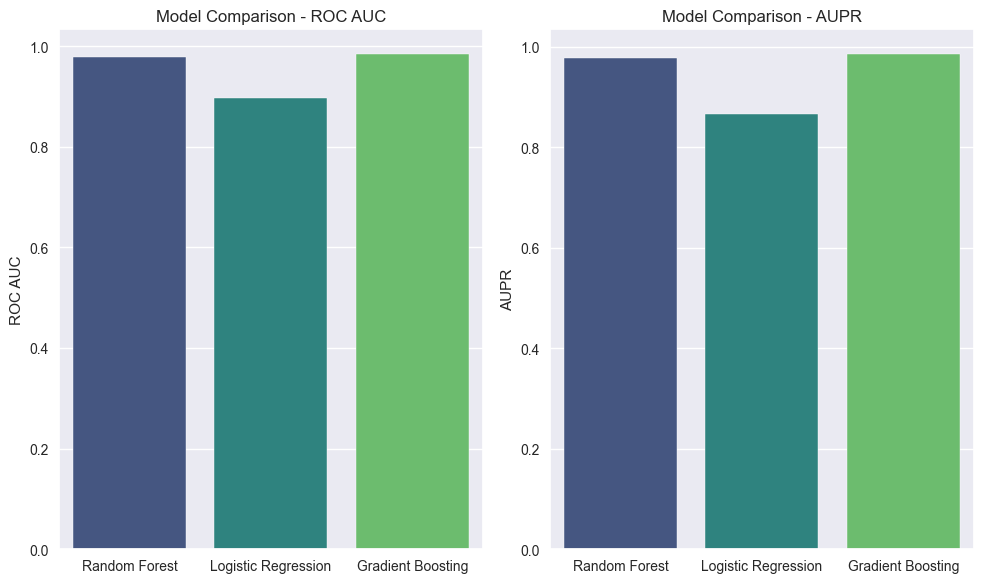

In [81]:
# Vẽ biểu đồ so sánh ROC AUC và AUPR
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.barplot(x=list(roc_auc_scores.keys()), y=list(roc_auc_scores.values()), palette='viridis')
plt.title('Model Comparison - ROC AUC')
plt.ylabel('ROC AUC')

plt.subplot(1, 2, 2)
sns.barplot(x=list(aupr_scores.keys()), y=list(aupr_scores.values()), palette='viridis')
plt.title('Model Comparison - AUPR')
plt.ylabel('AUPR')

plt.tight_layout()
plt.show()

In [82]:
# Lấy 100 dòng ngẫu nhiên từ tập train
train_indices = np.random.choice(X_train.index, size=100, replace=False)
X_train_demo = X_train.loc[train_indices]
y_train_demo = y_train.loc[train_indices]

# Lấy 100 dòng ngẫu nhiên từ tập test
test_indices = np.random.choice(X_test.index, size=100, replace=False)
X_test_demo = X_test.loc[test_indices]
y_test_demo = y_test.loc[test_indices]

# Kết hợp X và y thành một DataFrame cho tập train
train_demo = pd.concat([X_train_demo, y_train_demo], axis=1)

# Kết hợp X và y thành một DataFrame cho tập test
test_demo = pd.concat([X_test_demo, y_test_demo], axis=1)

# Lưu các tập dữ liệu vào file CSV
train_demo.to_csv('train_demo.csv', index=False)
test_demo = test_demo.drop(columns = 'y')
print(type(test_demo))
# test_demo.to_csv('./data/test_demo1.csv', index=False)

<class 'pandas.core.frame.DataFrame'>


In [83]:
# Lấy 1 file gọp của cả demo train demo test
train_demo['Dataset'] = 'Train'
test_demo['Dataset'] = 'Test'

# Kết hợp cả hai tập
combined_demo = pd.concat([train_demo, test_demo], axis=0)

# Lưu vào file CSV
combined_demo.to_csv('combined_demo.csv', index=False)

In [84]:
# Huấn luyện và đánh giá Random Forest trên tập demo
print("\n--- Random Forest trên tập demo ---")
RFclf = RandomForestClassifier(max_depth=10, random_state=0)
RFclf.fit(X_train_demo, y_train_demo['y'])
y_pred_rf = RFclf.predict(X_test_demo)
print("Classification Report for Random Forest (Demo):\n", classification_report(y_test_demo['y'], y_pred_rf))


--- Random Forest trên tập demo ---
Classification Report for Random Forest (Demo):
               precision    recall  f1-score   support

          no       0.82      0.79      0.80        47
         yes       0.82      0.85      0.83        53

    accuracy                           0.82       100
   macro avg       0.82      0.82      0.82       100
weighted avg       0.82      0.82      0.82       100



In [85]:
import pickle

# Lưu model
with open('model\model.pkl', 'wb') as f:
    pickle.dump(RFclf, f)

# Load lại model
with open('model\model.pkl', 'rb') as f:
    model = pickle.load(f)

In [86]:
import pickle

# sau khi get_dummies
with open("model/feature_columns.pkl", "wb") as f:
    pickle.dump(X.columns.tolist(), f)

with open("model/scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)
